In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [2]:
cd /Users/austinmcdonald/Documents/Gas-physics/MB-XeArHe/

/Users/austinmcdonald/Documents/Gas-physics/MB-XeArHe


In [3]:
####################
###       [0    , 1    ,2    , 3   , 4     , 5     , 6   , 7    , 8   , 9    , 10  , 11  , 12]
###Vals = [XePer, ArPer, Temp, Pres, Efield, Zdrift, Zerr, Tdiff, Terr, Ldiff, Lerr, Mele, Merr]
########
Data = np.loadtxt("ErrorXeAr-No2.txt")
#Data = np.loadtxt("ErrorXeAr.txt")

In [4]:
len(Data)

679

In [5]:
np.mean(Data[:,12])

0.6050662739322533

In [6]:
np.unique(Data[:,0])[2:-1]

array([ 1.431,  2.581,  7.72 ,  8.554, 14.909, 15.597, 35.352, 35.784,
       98.926, 99.168])

In [7]:
len(np.unique(Data[:,0])[1:-1])

11

In [8]:
Fractions = [0,2,8,15,35,99,100]
Fractions = np.unique(Data[:,0])[2:-1]

In [9]:
mm = dict()
this = Data[:,0]
for y in range(0,len(Fractions)):
    hold = []
    for x in range(0,len(this)):
        if this[x] == Fractions[y]:
            hold.append(Data[x])
    mm[y] = np.array(hold)

In [10]:
mm.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
COL = ['b','g','r','m','y','c','k','lime','orange']
COL =['b','g','r','m','y','c','k','lime','orange','steelblue','grey','blue','red']


In [12]:
len(COL)

13

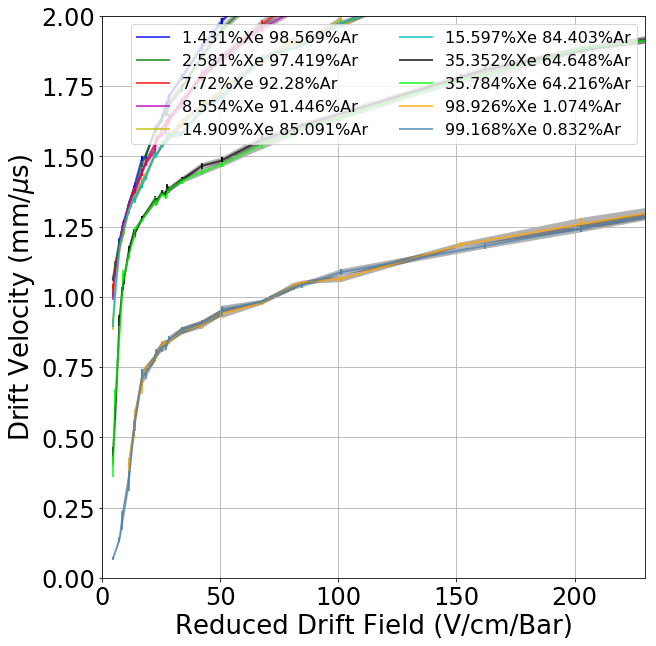

In [14]:
DDD=[]
plt.figure(figsize=(9,9))
#for x in [ 0,1, 2, 3, 4,5,6,7,8,9]:
for x in range(0,len(mm)):

    Vz = mm[x][:,5]
    err= mm[x][:,6]/100*Vz
    P  = mm[x][:,3]/760
    E  = mm[x][:,4]
    xe = str(mm[x][0][0])
    ar = str(mm[x][0][1])
    lab = xe+'%Xe '+ar+'%Ar'
    X = E/P
    Y = Vz
    Yer =Vz*mm[x][:,6]/100
    drop = np.where(Y == 0)[0]
    X = np.delete(X,drop)
    Y = np.delete(Y,drop)
    Yer=np.delete(Yer,drop)
    SORT = X.argsort()
    X = X[SORT]
    Y = Y[SORT]
    Yer = Yer[SORT]
    #####################################
    Vz = mm[x][:,5]
    err= mm[x][:,6]/100*Vz
    P  = mm[x][:,3]/760
    E  = mm[x][:,4]
    xe = str(mm[x][0][0])
    ar = str(mm[x][0][1])
    lab = xe+'%Xe '+ar+'%Ar'
    X = E/P
    Y = Vz
    Yer =Vz*mm[x][:,6]/100
    drop = np.where(Y == 0)[0]
    X = np.delete(X,drop)
    Y = np.delete(Y,drop)
    Yer=np.delete(Yer,drop)
    SORT = X.argsort()
    X = X[SORT]
    Y = Y[SORT]
    Yer = Yer[SORT]
    
    
    plt.plot(X,Y,label=lab, color=COL[x],linewidth=2,alpha=0.7)
    plt.errorbar(X,Y,yerr=Yer,ecolor=COL[x],fmt='none')
    plt.fill_between(X,Y+Yer,Y-Yer,facecolor='k',alpha=0.3, interpolate=True)
    DDD.append(X)
    DDD.append(Y)
    DDD.append(Yer)


    

plt.xlabel(r'Reduced Drift Field (V/cm/Bar)',fontsize=26)
plt.ylabel(r'Drift Velocity (mm/$\mu$s)',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=16,ncol=2)
plt.tight_layout()
plt.ylim(0,3.8)
plt.ylim(0,2)

plt.xlim(0,230)
#plt.savefig("/Users/austinmcdonald/Desktop/Daigo/"+'vel.png')

plt.show()

In [24]:
def BAND(DIC,N):
    tt=[]
    Vz = mm[2*N][:,5]
    err= mm[2*N][:,6]/100*Vz
    P  = mm[2*N][:,3]/760
    E  = mm[2*N][:,4]
    X = E/P
    Y = Vz
    Yer =err
    tt.append(Y)
    tt.append(Y+Yer)
    tt.append(Y-Yer)

    Vz = mm[2*N+1][:,5]
    err= mm[2*N+1][:,6]/100*Vz
    P  = mm[2*N+1][:,3]/760
    E  = mm[2*N+1][:,4]

    X = E/P
    Y = Vz
    Yer = err
    tt.append(Y)
    tt.append(Y+Yer)
    tt.append(Y-Yer)
    upper = []
    lower = []
    XVAL = []
    tt = np.array(tt)
    for x in range(0,len(tt[0])):
        if np.any(tt[:,x]==0)==False:
            MAX = max(tt[:,x])
            MIN = min(tt[:,x])
            upper.append(MAX)
            lower.append(MIN)
            XVAL.append(X[x])

    upper = np.array(upper)
    lower = np.array(lower)
    XVAL = np.array(XVAL)
    SORT = XVAL.argsort()
    upper = upper[SORT]
    lower = lower[SORT]
    XVAL = XVAL[SORT]
    return XVAL,upper,lower

IndexError: too many indices for array

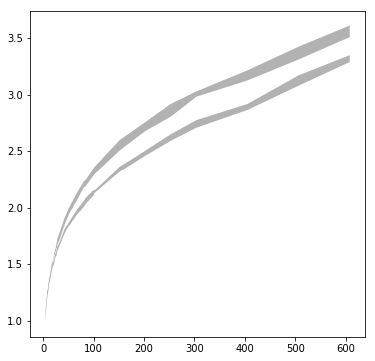

In [25]:
DDD=[]
plt.figure(figsize=(6,6))

for x in range(0,5):
    x,y1,y2 = BAND(mm,x)
    plt.fill_between(x,y1,y2,facecolor='k',alpha=0.3, interpolate=True)
    DDD.append(x)
    DDD.append(y1)
    DDD.append(y2)

#plt.plot(X,Y,label=lab, color=COL[x],linewidth=2,alpha=0.7)
#plt.errorbar(X,Y,yerr=Yer,ecolor=COL[x],fmt='none')
#plt.fill_between(XVAL,upper,lower,facecolor='k',alpha=0.3, interpolate=True)
#plt.scatter(XVAL,upper)   
#plt.scatter(XVAL,lower)   

plt.xlabel(r'Reduced Drift Field (V/cm/Bar)',fontsize=26)
plt.ylabel(r'Drift Velocity (mm/$\mu$s)',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
#plt.legend(loc='upper right',fontsize=16,ncol=2)
plt.tight_layout()
plt.ylim(0,3.8)
plt.xlim(0,230)
#plt.savefig("/Users/austinmcdonald/Desktop/Daigo/"+'vel.png')

plt.show()

In [ ]:
DDD = np.array(DDD)
#np.save('MBV-Error-XeAr.npy',DDD)

/Users/austinmcdonald/miniconda/envs/IC-3.6-2018-11-14/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


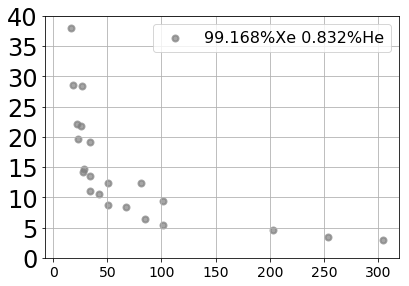

In [122]:
DDD=[]
####################
###       [0    , 1    ,2    , 3   , 4     , 5     , 6   , 7    , 8   , 9    , 10  , 11  , 12]
###Vals = [XePer, ArPer, Temp, Pres, Efield, Zdrift, Zerr, Tdiff, Terr, Ldiff, Lerr, Mele, Merr]
########
#plt.figure(figsize=(9,9))
#for x in [ 0,1, 2, 3, 4,5,6,7,8,9]:
for x in [10]:

    Vz = mm[x][:,5]
    Dl = mm[x][:,9]
    Sigma = 15.12*Dl**2/Vz**2*1e-6
    err= mm[x][:,6]/100*Vz
    P  = mm[x][:,3]/760
    E  = mm[x][:,4]
    xe = str(mm[x][0][0])
    ar = str(mm[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    X = E/P
    Y = Vz
    Yer =Vz*mm[x][:,6]/100
    drop = np.where(Y == 0)[0]
    X = np.delete(X,drop)
    Y = np.delete(Y,drop)
    Yer=np.delete(Yer,drop)
    SORT = X.argsort()
    X = X[SORT]
    Y = Y[SORT]
    Yer = Yer[SORT]
    #####################################
    Vz = mm[x][:,5]
    err= mm[x][:,6]/100*Vz
    P  = mm[x][:,3]/760
    E  = mm[x][:,4]
    xe = str(mm[x][0][0])
    ar = str(mm[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    X = E/P
    Y = Vz
    Yer =Vz*mm[x][:,6]/100
    drop = np.where(Y == 0)[0]
    X = np.delete(X,drop)
    Y = np.delete(Y,drop)
    Yer=np.delete(Yer,drop)
    SORT = X.argsort()
    X = X[SORT]
    Y = Y[SORT]
    Yer = Yer[SORT]
    
    plt.scatter(E/P,Sigma*np.sqrt(P),label=lab, color=COL[x],linewidth=2,alpha=0.7)
    #plt.plot(X,Y,label=lab, color=COL[x],linewidth=2,alpha=0.7)
    #plt.errorbar(X,Y,yerr=Yer,ecolor=COL[x],fmt='none')
    #plt.fill_between(X,Y+Yer,Y-Yer,facecolor='k',alpha=0.3, interpolate=True)
    #DDD.append(X)
    #DDD.append(Y)
    #DDD.append(Yer)
    
    

#plt.xlabel(r'Reduced Drift Field (V/cm/Bar)',fontsize=26)
#plt.ylabel(r'Drift Velocity (mm/$\mu$s)',fontsize=26)
plt.xticks(fontsize=14)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=16,ncol=2)
plt.tight_layout()
plt.ylim(0,40)
#plt.ylim(0,2)

#plt.xlim(0,20)
#plt.savefig("/Users/austinmcdonald/Desktop/Daigo/"+'vel.png')

plt.show()

In [73]:
DDD = np.array(DDD)
#np.save('MB-Error.npy',DDD)

In [53]:
MBZV = np.load("/Users/austinmcdonald/Documents/Gas-physics/MB-Error.npy")

No handles with labels found to put in legend.


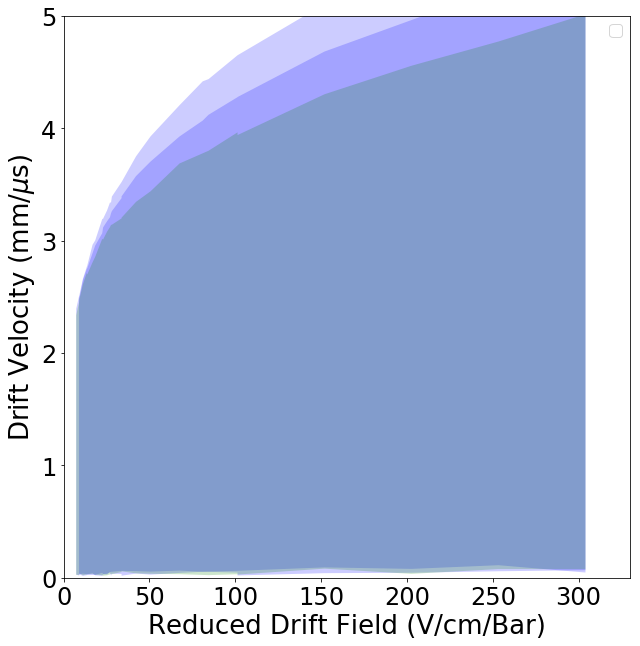

In [54]:
COL =['b','b','g','g','r','r','m','m','y','y','c','c','k','k','lime','orange','steelblue','pink','blue']
plt.figure(figsize=(9,9))
#for q in range(0,len(GOLDD)):
for q in range(0,3):
  
    eh1 =q*3
    eh2 =q*3+1
    eh3 =q*3+2
    X = MBZV[eh1]
    Y = MBZV[eh2]
    Yer = MBZV[eh3]
    #plt.plot(MBZV[eh1],MBZV[eh2],color=COL[q],alpha=0.5,linewidth=2)
    plt.fill_between(X,Y+Yer,Y-Yer,facecolor=COL[q],alpha=0.2, interpolate=True)
    
    
plt.xlabel(r'Reduced Drift Field (V/cm/Bar)',fontsize=26)
plt.ylabel(r'Drift Velocity (mm/$\mu$s)',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=16,ncol=4)
plt.tight_layout()

plt.grid()
plt.ylim(0,5)
#plt.ylim(0,2)

plt.xlim(0,330)
#plt.xlim(0,130)
#plt.savefig("/Users/austinmcdonald/Desktop/Daigo/XeHe/Vdrifr"+'ALL'+".png")

plt.show()

In [26]:
def Mark(Redu,pre):
    #sort_index = np.argsort(Redu)
    ms = ['<','s','D','^','*','o',","]
    mark = np.rint(pre).astype(str)
    mark[mark == "1.0"]  = ms[0]
    mark[mark == "3.0"]  = ms[1]
    mark[mark == "6.0"]  = ms[2]
    mark[mark == "9.0"]  = ms[3]
    mark[mark == "10.0"] = ms[4]
    mark[mark == "11.0"] = ms[5]
    mark[mark == "0.0"]  = ms[6]
    #mark = mark[sort_index]
    return mark

In [27]:
for x, y, m in zip(X, Y, mark):
        plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=60) 

NameError: name 'mark' is not defined

/Users/austinmcdonald/miniconda/envs/IC-3.6-2018-11-14/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


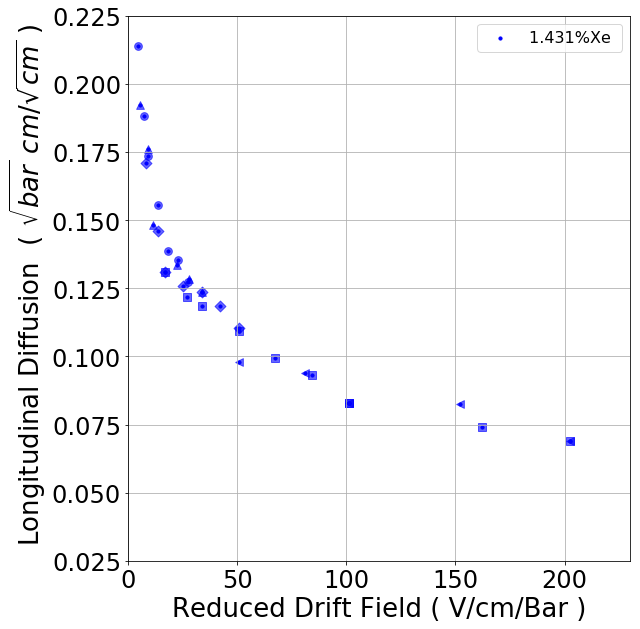

In [39]:
###       [0    , 1    ,2    , 3   , 4     , 5     , 6   , 7    , 8   , 9    , 10  , 11  , 12]
###Vals = [XePer, ArPer, Temp, Pres, Efield, Zdrift, Zerr, Tdiff, Terr, Ldiff, Lerr, Mele, Merr]
Vz = Data[:,5]
P  = Data[:,3]
E  = Data[:,4]
plt.figure(figsize=(9,9))
#for x in [0, 1, 2, 3, 4,5,6,7,8,9]:
for x in [0 ]:
    Vd = mm[x][:,5]
    Vz = mm[x][:,9]
    err = mm[x][:,10]/100*mm[x][:,9]
    P  = mm[x][:,3]/760
    E  = mm[x][:,4]
    xe = str(mm[x][0][0])
    ar = str(mm[x][0][1])
    lab = xe+'%Xe '
    col = cm.plasma((2+x)/7)
    cc = np.sqrt(P)
    YYY = Vz*cc*Vd#np.sqrt(Vd)
    YYY = np.sqrt(2*Vz/(Vd*1e5))*np.sqrt(P)
    #YYY = Vz*(Vd*1e5)**2#*np.sqrt(P)
    #YYY = Vz*cc
    XXX = E/P
    plt.scatter(XXX,YYY,label=lab, color=COL[x],s=10)
    color = COL[x]
    mark = Mark(E/P,P)
    for x, y, m in zip(XXX, YYY, mark):
        plt.scatter(x, y, alpha=0.6,marker=m,color=color,s=60) 
    #plt.errorbar(E/P,Vz,yerr=err,color=COL[x],alpha=0.9,fmt='D',markersize=0,linewidth=1.4)
    #plt.errorbar(extr,SIGM,yerr=7.66e-3,xerr=0.025,color='b',alpha=0.9,fmt='D',markersize=3,linewidth=1.4)

    
plt.xlabel(r'Reduced Drift Field ( V/cm/Bar )',fontsize=26)
plt.ylabel(r' Longitudinal Diffusion  ( $\sqrt{bar}$ $cm$/$\sqrt{cm}$ )',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=16,ncol=2)
plt.tight_layout()
#plt.ylim(0,4000)
plt.ylim(0.025,0.225)
plt.xlim(0,230)
#plt.ylim(200,5500)
#plt.savefig("/Users/austinmcdonald/Desktop/DslashSTARBARMB"+".png")

plt.show()

/Users/austinmcdonald/miniconda/envs/IC-3.6-2018-11-14/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


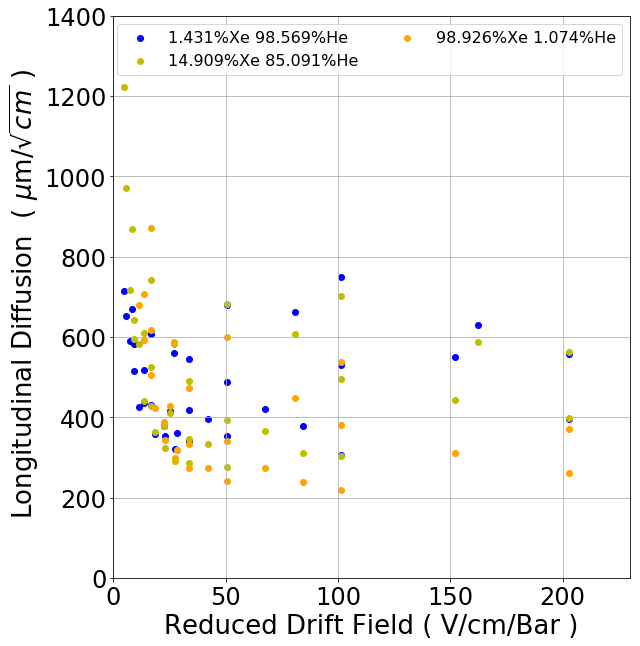

In [69]:
###       [0    , 1    ,2    , 3   , 4     , 5     , 6   , 7    , 8   , 9    , 10  , 11  , 12]
###Vals = [XePer, ArPer, Temp, Pres, Efield, Zdrift, Zerr, Tdiff, Terr, Ldiff, Lerr, Mele, Merr]
Vz = Data[:,5]
P  = Data[:,3]
E  = Data[:,4]
plt.figure(figsize=(9,9))
#for x in [0, 1, 2, 3, 4,5,6,7,8,9]:
for x in [0 ,4,8]:
    Vd = mm[x][:,5]
    Vz = mm[x][:,9]
    err = mm[x][:,10]/100*mm[x][:,9]
    P  = mm[x][:,3]/760
    E  = mm[x][:,4]
    xe = str(mm[x][0][0])
    ar = str(mm[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    col = cm.plasma((2+x)/7)
    cc = np.sqrt(P)
    XXX = Vz*cc/np.sqrt(Vd)
    YYY = E/P
    plt.scatter(YYY,XXX,label=lab, color=COL[x])
    #plt.errorbar(E/P,Vz,yerr=err,color=COL[x],alpha=0.9,fmt='D',markersize=0,linewidth=1.4)
    #plt.errorbar(extr,SIGM,yerr=7.66e-3,xerr=0.025,color='b',alpha=0.9,fmt='D',markersize=3,linewidth=1.4)

    
plt.xlabel(r'Reduced Drift Field ( V/cm/Bar )',fontsize=26)
plt.ylabel(r' Longitudinal Diffusion  ( $\mu$m/$\sqrt{cm}$ )',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=16,ncol=2)
plt.tight_layout()
plt.ylim(0,1400)
plt.xlim(0,230)
#plt.ylim(200,5500)
plt.show()

In [27]:
np.rint(P)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  9.,  9.,  9.,  9.,  9.,  9.,  9., 11., 11., 11., 11.,
       11., 11., 11.])

In [15]:
xx =[22.854850598683974,28.451871561612315,25.976097587285608,26.319397001186584,28.014994067095756,
    28.519560605515803,29.997258279098197,33.05297364352235,33.95935960591133,38.01773578799755,
    37.9184944806012,38.25720937758441,41.933991945633025,43.51618963719392,44.248768472906406,
    47.63214195821797,48.660556973859265,53.69206429110784,57.135441012548995]
yy = [1359.8234511524215, 1319.460824853475, 1212.1804322030848, 1166.3406565747364, 1159.099816619323, 1200.6031785983962
    , 1107.4538851533564, 1055.756714968897, 1029.9377943979, 1129.9827406421919, 983.9254251914708, 986.773219229801
    , 939.3423465535218, 936.4028621768364, 956.4156269102153, 1024.9892129013697, 903.2217467908381, 868.6140376110171
    , 899.9532559059364]

/Users/austinmcdonald/miniconda/envs/IC-3.6-2018-11-14/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
No handles with labels found to put in legend.


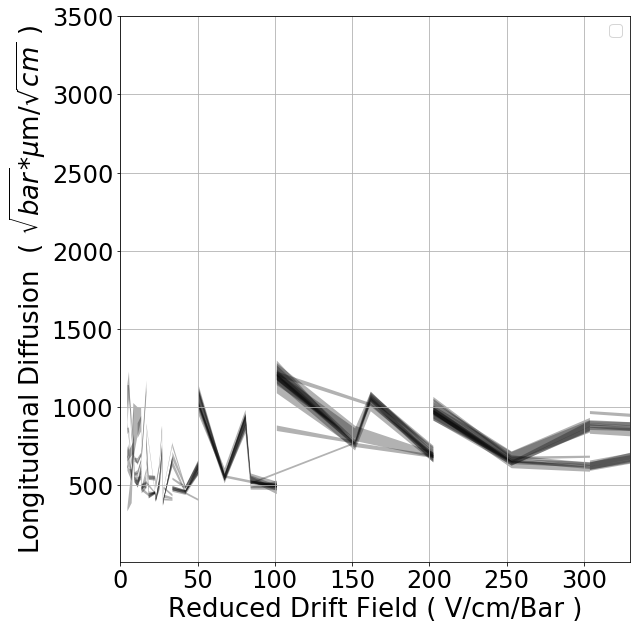

In [18]:
###       [0    , 1    ,2    , 3   , 4     , 5     , 6   , 7    , 8   , 9    , 10  , 11  , 12]
###Vals = [XePer, ArPer, Temp, Pres, Efield, Zdrift, Zerr, Tdiff, Terr, Ldiff, Lerr, Mele, Merr]
Vz = Data[:,5]
P  = Data[:,3]
E  = Data[:,4]
DDD = []
plt.figure(figsize=(9,9))
#for x in [0, 1, 2, 3, 4,5,6]:
for x in [0, 1,2,3,4,5,6,7,8,9]:


    Vd = mm[x][:,5]
    Vz = mm[x][:,9]
    #err = mm[x][:,10]/100*mm[x][:,9]
    P  = mm[x][:,3]/760
    E  = mm[x][:,4]
    Dr = np.sqrt((273/296*2*P)*Vz/Vd)
    Dr = Vz*np.sqrt(P)
    xe = str(mm[x][0][0])
    ar = str(mm[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    X = E/P
    Y = Dr
    Yer =Dr*mm[x][:,10]/100
    drop = np.where(Y == 0)[0]
    X = np.delete(X,drop)
    Y = np.delete(Y,drop)
    Yer=np.delete(Yer,drop)
    SORT = X.argsort()
    X = X[SORT]
    Y = Y[SORT]
    Yer = Yer[SORT]
    #plt.plot(X,Y,label=lab, color=COL[x],linewidth=2,alpha=0.7)
    #plt.errorbar(X,Y,yerr=Yer,ecolor=COL[x],fmt='none')
    plt.fill_between(X,Y+Yer,Y-Yer,facecolor='k',alpha=0.3, interpolate=True)
    #plt.errorbar(REDU[q],DlStar[q]/2.355,xerr=Xer,yerr=Yer,ecolor=COL[q],fmt='none', capthick=1)

    DDD.append(X)
    DDD.append(Y)
    DDD.append(Yer)
    
plt.xlabel(r'Reduced Drift Field ( V/cm/Bar )',fontsize=26)
plt.ylabel(r'Longitudinal Diffusion  ( $\sqrt{bar}$*$\mu$m/$\sqrt{cm}$ )',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=16,ncol=2)
plt.tight_layout()
plt.xlim(0,330)
plt.ylim(10,3500)
#plt.savefig("/Users/austinmcdonald/Desktop/Daigo/"+'lon.png')
plt.show()

//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


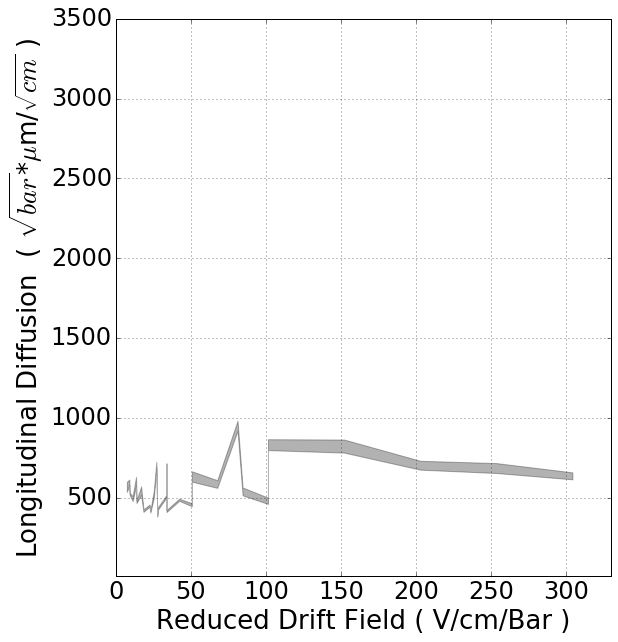

In [95]:
###       [0    , 1    ,2    , 3   , 4     , 5     , 6   , 7    , 8   , 9    , 10  , 11  , 12]
###Vals = [XePer, ArPer, Temp, Pres, Efield, Zdrift, Zerr, Tdiff, Terr, Ldiff, Lerr, Mele, Merr]
Vz = Data[:,5]
P  = Data[:,3]
E  = Data[:,4]
DDD = []
plt.figure(figsize=(9,9))
#for x in [0, 1, 2, 3, 4,5,6]:
for x in [ 0]:
#for x in [ 0,1, 2, 3, 4,5,6,7,8,9]:

#for x in range(1,len(mm)):
    x1 = 2*x
    x2 = 2*x+1

    Vz = mm[x1][:,9]
    err= mm[x1][:,6]/100*Vz
    P  = mm[x1][:,3]/760
    E  = mm[x1][:,4]
    xe = str(mm[x1][0][0])
    ar = str(mm[x1][0][1])
    lab = xe+'%Xe '+ar+'%He'
    X = E/P
    Y1 = Vz
    YerUP =Vz*mm[x1][:,10]/100
    drop1 = np.where(Y1 == 0)[0]
    #####################################
    Vz = mm[x2][:,9]
    err= mm[x2][:,6]/100*Vz
    P  = mm[x2][:,3]/760
    E  = mm[x2][:,4]
    X = E/P
    Y2 = Vz
    YerDN =Vz*mm[x2][:,10]/100
    drop2 = np.where(Y2 == 0)[0]
    DROP = np.unique(np.concatenate((drop1,drop2),0))
    XX  = np.delete(X,DROP)
    Y1  = np.delete(Y1,DROP)
    Y2  = np.delete(Y2,DROP)
    YY = Y1
    YerUP = np.delete(YerUP,DROP)
    YerDN = np.delete(YerDN,DROP)
    SORT = XX.argsort()
    XX = XX[SORT]
    YY = YY[SORT]
    YerUP = YerUP[SORT]
    YerDN = YerDN[SORT]
   
    
    #plt.plot(X,Y,label=lab, color=COL[x],linewidth=2,alpha=0.7)
    #plt.errorbar(X,Y,yerr=Yer,ecolor=COL[x],fmt='none')
    plt.fill_between(XX,YY+YerUP,YY-YerDN,facecolor='k',alpha=0.3, interpolate=True)
    
plt.xlabel(r'Reduced Drift Field ( V/cm/Bar )',fontsize=26)
plt.ylabel(r'Longitudinal Diffusion  ( $\sqrt{bar}$*$\mu$m/$\sqrt{cm}$ )',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=16,ncol=2)
plt.tight_layout()
plt.xlim(0,330)
plt.ylim(10,3500)
#plt.savefig("/Users/austinmcdonald/Desktop/Daigo/"+'lon.png')
plt.show()

In [36]:
DDD = np.array(DDD)
#np.save('MB-XeAr-Dl.npy',DDD)

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in true_divide


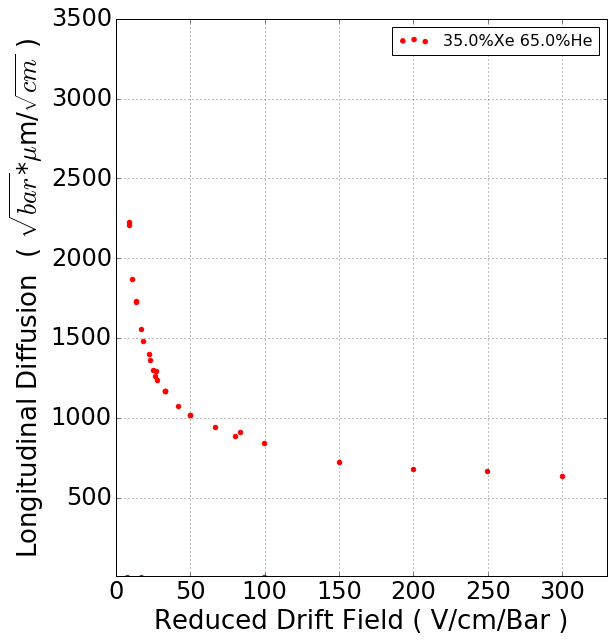

In [101]:
###       [0    , 1    ,2    , 3   , 4     , 5     , 6   , 7    , 8   , 9    , 10  , 11  , 12]
###Vals = [XePer, ArPer, Temp, Pres, Efield, Zdrift, Zerr, Tdiff, Terr, Ldiff, Lerr, Mele, Merr]
Vz = Data[:,5]
P  = Data[:,3]
E  = Data[:,4]
plt.figure(figsize=(9,9))
for x in [ 2]:
#for x in [5]:

    Vd = mm[x][:,5]
    Vz = mm[x][:,9]
    #err = mm[x][:,10]/100*mm[x][:,9]
    P  = mm[x][:,3]/760*1.014
    E  = mm[x][:,4]
    Dr = np.sqrt((273/296*2*P)*Vz/Vd)
    Dr = Vz*np.sqrt(P)
    xe = str(mm[x][0][0])
    ar = str(mm[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    col = cm.plasma((2+x)/7)
    plt.scatter(E/P,Dr,label=lab, color=COL[x])
    #plt.scatter(xx,yy, color='lime',label='NEXT data')
    #plt.errorbar(E/P,Vz,yerr=err,color=col,alpha=0.9,fmt='D',markersize=0,linewidth=1.4)
    #plt.errorbar(extr,SIGM,yerr=7.66e-3,xerr=0.025,color='b',alpha=0.9,fmt='D',markersize=3,linewidth=1.4)

    
plt.xlabel(r'Reduced Drift Field ( V/cm/Bar )',fontsize=26)
plt.ylabel(r'Longitudinal Diffusion  ( $\sqrt{bar}$*$\mu$m/$\sqrt{cm}$ )',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=16,ncol=2)
plt.tight_layout()
plt.xlim(0,330)
plt.ylim(10,3500)
#plt.savefig("/Users/austinmcdonald/Desktop/Daigo/"+'lon.png')
plt.show()

In [14]:
P*1.014

array([  1.01466711,   1.01466711,   1.01466711,   1.01466711,
         1.01466711,   1.01466711,   3.04400132,   3.04400132,
         3.04400132,   3.04400132,   3.04400132,   3.04400132,
         6.08800263,   6.08800263,   6.08800263,   6.08800263,
         6.08800263,   6.08800263,   9.13200395,   9.13200395,
         9.13200395,   9.13200395,   9.13200395,   9.13200395,
        11.16133816,  11.16133816,  11.16133816,  11.16133816,
        11.16133816,  11.16133816])

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in true_divide
//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in true_divide


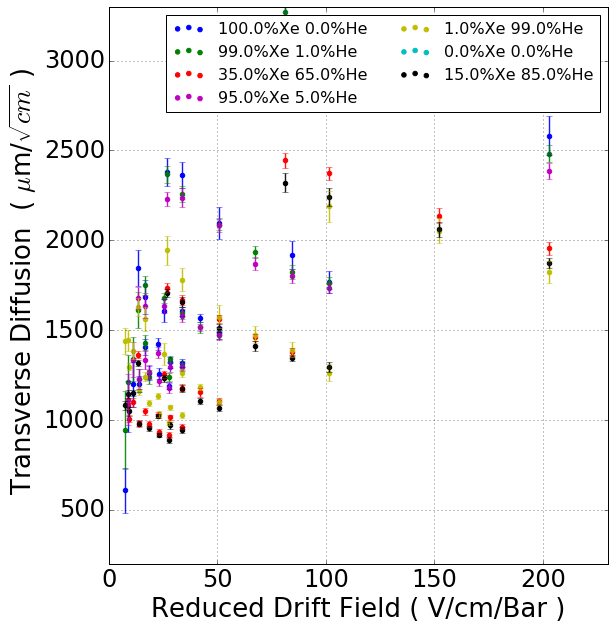

In [79]:
###       [0    , 1    ,2    , 3   , 4     , 5     , 6   , 7    , 8   , 9    , 10  , 11  , 12]
###Vals = [XePer, ArPer, Temp, Pres, Efield, Zdrift, Zerr, Tdiff, Terr, Ldiff, Lerr, Mele, Merr]
Vz = Data[:,5]
P  = Data[:,3]
E  = Data[:,4]
plt.figure(figsize=(9,9))
for x in [0, 1, 2, 3, 4,5,6]:
    Vz = mm[x][:,7]
    err = mm[x][:,8]/100*mm[x][:,7]
    P  = mm[x][:,3]/760
    E  = mm[x][:,4]
    xe = str(mm[x][0][0])
    ar = str(mm[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    col = cm.plasma((2+x)/7)
    plt.scatter(E/P,Vz,label=lab, color=COL[x])
    plt.errorbar(E/P,Vz,yerr=err,color=COL[x],alpha=0.9,fmt='D',markersize=0,linewidth=1.4)
    #plt.errorbar(extr,SIGM,yerr=7.66e-3,xerr=0.025,color='b',alpha=0.9,fmt='D',markersize=3,linewidth=1.4)


#plt.scatter(NEXTX,NEXTY,color='r',alpha=0.4,label="All NEXT Xe data")

    
plt.xlabel(r'Reduced Drift Field ( V/cm/Bar )',fontsize=26)
plt.ylabel(r' Transverse Diffusion  ( $\mu$m/$\sqrt{cm}$ )',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=16,ncol=2)
plt.tight_layout()
plt.xlim(0,230)
plt.ylim(200,3300)
plt.show()

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in true_divide
//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide


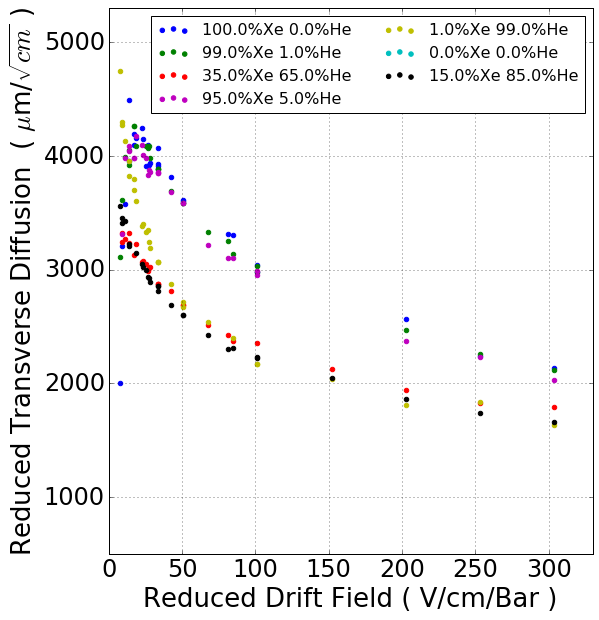

In [80]:
###       [0    , 1    ,2    , 3   , 4     , 5     , 6   , 7    , 8   , 9    , 10  , 11  , 12]
###Vals = [XePer, ArPer, Temp, Pres, Efield, Zdrift, Zerr, Tdiff, Terr, Ldiff, Lerr, Mele, Merr]
Vz = Data[:,5]
P  = Data[:,3]
E  = Data[:,4]
plt.figure(figsize=(9,9))
for x in [0, 1, 2, 3, 4,5,6]:
    Vd = mm[x][:,5]
    Vz = mm[x][:,7]
    #err = mm[x][:,10]/100*mm[x][:,9]
    P  = mm[x][:,3]/760
    E  = mm[x][:,4]
    Dr = np.sqrt((273/296*2*P)*Vz/Vd)
    Dr = Vz*np.sqrt(P)
    xe = str(mm[x][0][0])
    ar = str(mm[x][0][1])
    lab = xe+'%Xe '+ar+'%He'
    col = cm.plasma((2+x)/7)
    plt.scatter(E/P,Dr,label=lab, color=COL[x])
    #plt.errorbar(E/P,Vz,yerr=err,color=col,alpha=0.9,fmt='D',markersize=0,linewidth=1.4)
    #plt.errorbar(extr,SIGM,yerr=7.66e-3,xerr=0.025,color='b',alpha=0.9,fmt='D',markersize=3,linewidth=1.4)


#plt.scatter(NEXTX,NEXTY,color='r',alpha=0.4,label="All NEXT Xe data")

    
plt.xlabel(r'Reduced Drift Field ( V/cm/Bar )',fontsize=26)
plt.ylabel(r'Reduced Transverse Diffusion  ( $\mu$m/$\sqrt{cm}$ )',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=16,ncol=2)
plt.tight_layout()
plt.xlim(0,330)
plt.ylim(500,5300)
#plt.savefig("/Users/austinmcdonald/Desktop/Daigo/"+'Trans.png')

plt.show()